# Case Study Feature Engineering

#### Predicting Central Neuropathic Pain (CNP) in people with Spinal Cord Injury (SCI) from Electroencephalogram (EEG) data.

* CNP is pain in response to non-painful stimuli, episodic (electric shock), “pins and needles”, numbness
* There is currently no treatment, only prevention
* Preventative medications have strong side-effects
* Predicting whether a patient is likely to develop pain is useful for selective treatment

#### Task
Your task is to devise a feature engineering strategy which, in combination with a classifier of your choice, optizimes prediction accuracy.

#### Data
The data is preprocessed brain EEG data from SCI patients recorded while resting with eyes closed (EC) and eyes opened (EO).
* 48 electrodes recording electrical activity of the brain at 250 Hz 
* 2 classes: subject will / will not develop neuropathic pain within 6 months
* 18 subjects: 10 developed pain and 8 didn’t develop pain
* the data has already undergone some preprocessing
  * Signal denoising and normalization
  * Temporal segmentation
  * Frequency band power estimation
  * Normalization with respect to total band power
  * Features include normalized alpha, beta, theta band power while eyes closed, eyes opened, and taking the ratio of eo/ec.
* the data is provided in a single table ('data.csv') consisting of 
  * 180 rows (18 subjects x 10 repetitions), each containing
  * 432 columns (9 features x 48 electrodes)
  * rows are in subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
  * columns are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
  * feature identifiers for all columns are stored in 'feature_names.csv'
  * 'labels.csv' defines the corresponding class (0 or 1) to each row in data.csv

#### Objective Measure
Leave one subject out cross-validation accuracy, sensitivity and specificity.

#### Report
Report on your feature engineering pipeline, the classifier used to evaluate performance, and the performance as mean and standard deviation of accuracy, sensitivity and specificity across folds. Give evidence for why your strategy is better than others.

#### Requirements

  * compare at least 2 feature selection methods (groups of 5-6: at least 4)
    - filtering methods (at least one scoring function)
    - wrapper methods (at least one, e.g., forward feature selection or backward feature elimination)
    - embedding methods  (at least one, e.g., L1 regularisation)
 * combine each method with at least 2 classifiers 
   (justify your choice of classifiers in the report)
    - SVM
    - KNN
    - ...
  * perform Leave-one-group-out cross-validation, where all 10 samples from each subject are in one group (18 groups in total)
  * use cross-validation to optimise hyper-parameter values
  * as a baseline for comparison, evaluate each of your classifiers trained on the full set of features (trained without feature selection)




In [10]:
import csv
import numpy as np

from matplotlib import pyplot as plt

In [11]:
# load data
# rows in X are subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
# columns in X are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
# feature identifiers for all columns in X are stored in feature_names.csv
X = np.loadtxt('csv/data.csv', delimiter=',') 
y = np.loadtxt('csv/labels.csv', delimiter=',')
with open('csv/feature_names.csv') as f:
    csvreader = csv.reader(f, delimiter=',')
    feature_names = [row for row in csvreader][0]

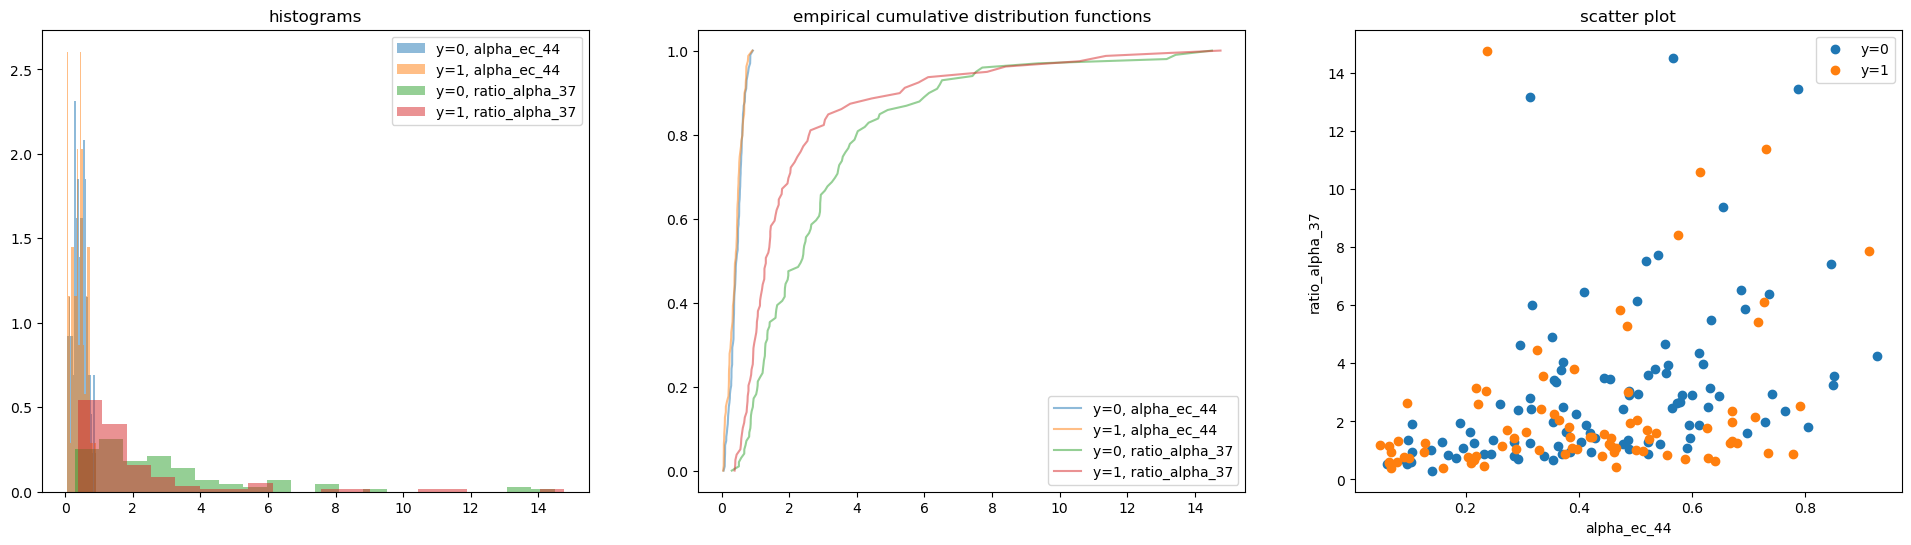

In [12]:
# plotting data in 2D with axes sampled 
# a) at random 
# b) from same electrode
# c) from same feature type
num_features = 9
num_electrodes = 48

# a) indices drawn at random
i0, i1 = np.random.randint(0, X.shape[1], size=2)

# b) same electrode, different feature (uncomment lines below)
#f0, f1 = np.random.randint(0, num_features, size=2)
#e = np.random.randint(0, num_electrodes)
#i0, i1 = f0*num_electrodes + e, f1*num_electrodes + e

# b) same feature, different electrode (uncomment lines below)
#f = np.random.randint(0, num_features)
#e0, e1 = np.random.randint(0, num_electrodes, size=2)
#i0, i1 = f*num_electrodes + e0, f*num_electrodes + e1

fig, axes = plt.subplots(1, 3, figsize=(24, 6))
colors = ['blue', 'red']

# select features i0, i1 and separate by class
X00, X01 = X[y==0][:,i0], X[y==1][:,i0]
X10, X11 = X[y==0][:,i1], X[y==1][:,i1]
# plot cumulative distribution of feature i0 separate for each class
axes[0].hist(X00, bins=20, label='y=0, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X01, bins=20, label='y=1, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X10, bins=20, label='y=0, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].hist(X11, bins=20, label='y=1, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].set_title('histograms')
axes[0].legend()
axes[1].plot(np.sort(X00), np.linspace(0,1,X00.shape[0]), label='y=0, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X01), np.linspace(0,1,X01.shape[0]), label='y=1, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X10), np.linspace(0,1,X10.shape[0]), label='y=0, '+ feature_names[i1], alpha=0.5)
axes[1].plot(np.sort(X11), np.linspace(0,1,X11.shape[0]), label='y=1, '+ feature_names[i1], alpha=0.5)
axes[1].set_title('empirical cumulative distribution functions')
axes[1].legend()
axes[2].scatter(X00, X10, label='y=0')
axes[2].scatter(X01, X11, label='y=1')
axes[2].set_xlabel(feature_names[i0])
axes[2].set_ylabel(feature_names[i1])
axes[2].set_title('scatter plot')
axes[2].legend()

In [13]:
import pandas as pd

# File paths
data_file = 'csv/data.csv'
feature_names_file = 'csv/feature_names.csv'
labels_file = 'csv/labels.csv'

# Load the datasets
data = pd.read_csv(data_file, header=None)
feature_names = pd.read_csv(feature_names_file, header=None)
labels = pd.read_csv(labels_file, header=None)

# Display the first few rows of each dataset to understand their structure
data_head = data.head()
feature_names_head = feature_names.head()
labels_head = labels.head()

data_head, feature_names_head, labels_head

(       0        1        2        3        4        5        6        7    \
 0  0.11184  0.12387  0.12858  0.11324  0.10571  0.10690  0.10756  0.11064   
 1  0.29834  0.26881  0.26239  0.38009  0.34358  0.28500  0.24791  0.25033   
 2  0.36912  0.39587  0.38999  0.25772  0.40554  0.44199  0.44004  0.39947   
 3  0.76120  0.77726  0.77042  0.60161  0.70183  0.72725  0.76245  0.78904   
 4  0.16770  0.15146  0.14714  0.15728  0.14965  0.14154  0.13228  0.12760   
 
        8        9    ...      422      423      424      425      426  \
 0  0.10875  0.15893  ...  0.57161  0.73870  0.58709  0.55198  0.54811   
 1  0.26047  0.26016  ...  0.35142  0.32788  0.43164  0.49603  0.40680   
 2  0.31546  0.28348  ...  0.61924  0.86506  1.09310  0.31759  0.36353   
 3  0.72984  0.52236  ...  0.23456  0.25090  0.43196  0.71301  0.53340   
 4  0.14351  0.17252  ...  1.82160  1.73190  1.24420  2.76220  3.00930   
 
        427      428      429      430      431  
 0  0.57869  0.59345  0.60436  0.5

/home/alex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

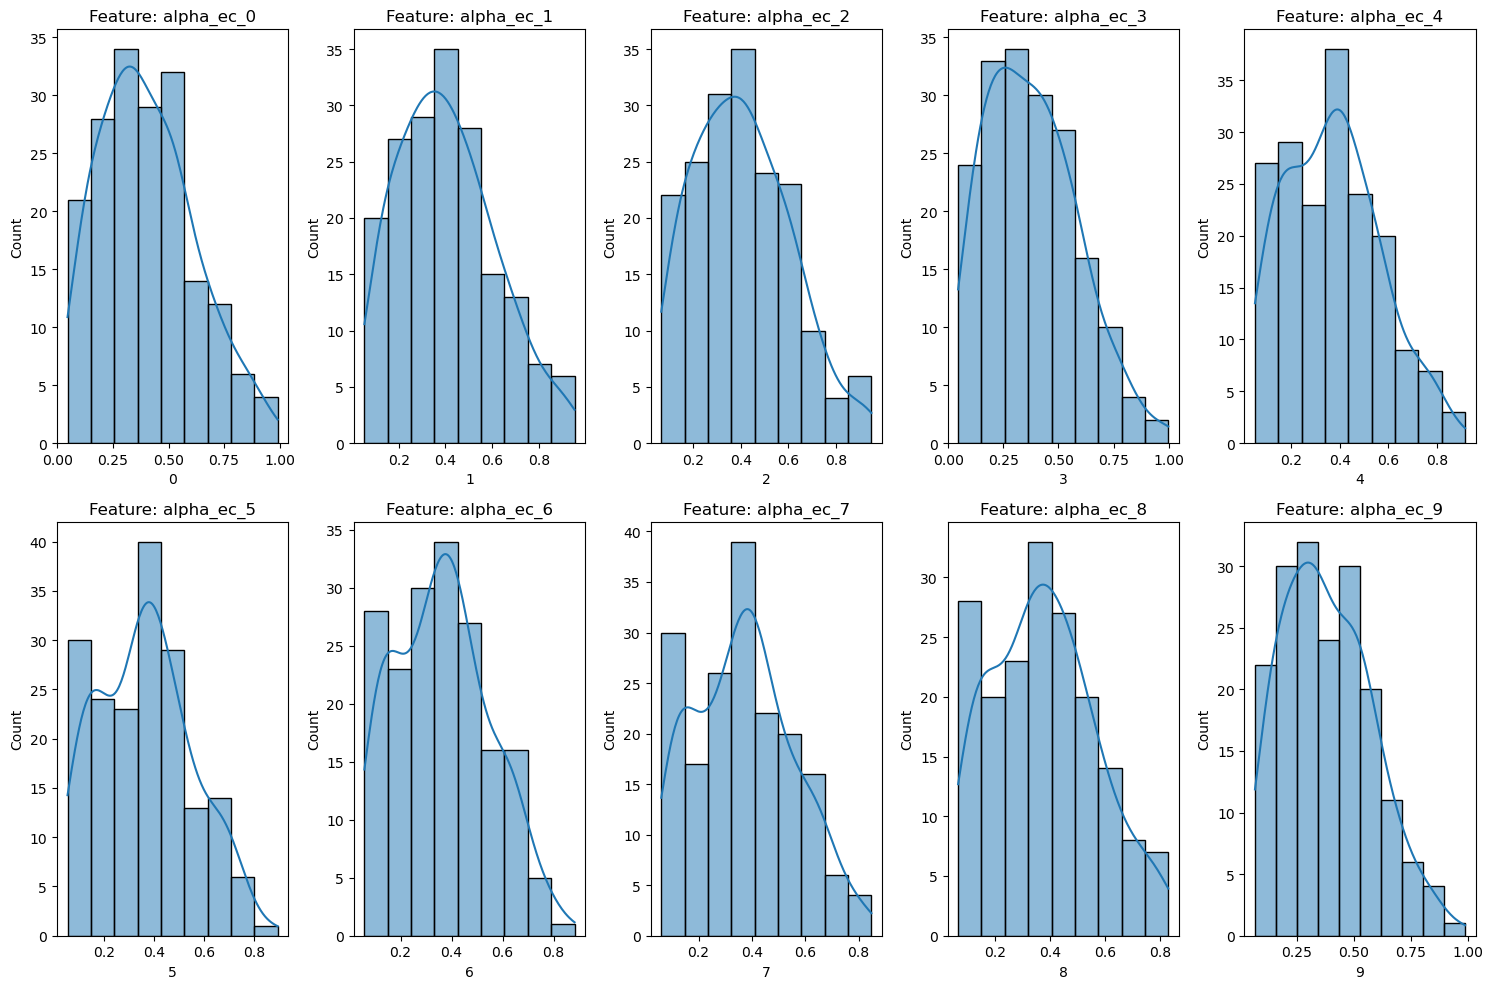

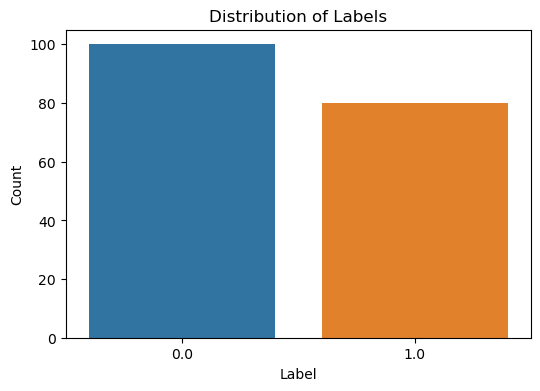

(              0           1           2           3           4           5    \
 count  180.000000  180.000000  180.000000  180.000000  180.000000  180.000000   
 mean     0.403767    0.406051    0.404508    0.378024    0.370230    0.363051   
 std      0.212651    0.208703    0.203369    0.207096    0.194484    0.188324   
 min      0.045305    0.052493    0.064302    0.045197    0.052021    0.054035   
 25%      0.240980    0.249482    0.258088    0.209325    0.209490    0.198185   
 50%      0.377190    0.384445    0.390135    0.358825    0.372940    0.360960   
 75%      0.540840    0.541517    0.544342    0.511320    0.503810    0.486233   
 max      0.991070    0.952930    0.950500    0.998370    0.914860    0.893100   
 
               6           7           8           9    ...         422  \
 count  180.000000  180.000000  180.000000  180.000000  ...  180.000000   
 mean     0.363476    0.369076    0.377025    0.384056  ...    0.999865   
 std      0.186206    0.186509    0

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical summary of the data
data_description = data.describe()

# Checking for missing values in the data
missing_values = data.isnull().sum().sum()

# Distribution of labels (to understand the balance between classes)
label_counts = labels[0].value_counts()

# Visualizing the distribution of a few features (selecting first 10 for demonstration)
plt.figure(figsize=(15, 10))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    sns.histplot(data.iloc[:, i-1], kde=True)
    plt.title(f'Feature: {feature_names.iloc[0, i-1]}')
plt.tight_layout()

# Visualizing the label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=labels[0])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

(data_description, missing_values, label_counts)

In [15]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Converting the normalized data back to a DataFrame for ease of use
data_normalized_df = pd.DataFrame(data_normalized, columns=feature_names.iloc[0])

# Displaying the first few rows of the normalized data to verify the transformation
data_normalized_df.head()


,alpha_ec_0,alpha_ec_1,alpha_ec_2,alpha_ec_3,alpha_ec_4,alpha_ec_5,alpha_ec_6,alpha_ec_7,alpha_ec_8,alpha_ec_9,...,ratio_theta_38,ratio_theta_39,ratio_theta_40,ratio_theta_41,ratio_theta_42,ratio_theta_43,ratio_theta_44,ratio_theta_45,ratio_theta_46,ratio_theta_47
0,-1.376627,-1.355841,-1.360565,-1.282122,-1.363906,-1.363955,-1.378199,-1.389515,-1.426743,-1.157623,...,-0.571508,-0.356933,-0.536192,-0.556666,-0.537475,-0.503384,-0.537981,-0.551653,-0.531866,-0.098731
1,-0.497158,-0.659425,-0.700764,0.010004,-0.137413,-0.415607,-0.622363,-0.638454,-0.619863,-0.637086,...,-0.865352,-0.880993,-0.744585,-0.629078,-0.692528,-0.843956,-0.442532,-0.578909,-0.657889,-0.488323
2,-0.163383,-0.048920,-0.071584,-0.582529,0.182062,0.420333,0.412327,0.163416,-0.327414,-0.517172,...,-0.507945,-0.195742,0.142157,-0.860019,-0.740006,-0.597103,-0.890343,-0.698610,-0.452494,-0.685516
3,1.685531,1.783604,1.804268,1.082636,1.709777,1.939286,2.148622,2.257987,1.876349,0.711178,...,-1.021302,-0.979193,-0.744156,-0.348257,-0.553615,-0.879248,-0.418243,-0.473488,-0.937870,-0.333193
4,-1.113211,-1.223275,-1.269047,-1.068874,-1.137345,-1.179503,-1.245073,-1.298327,-1.241881,-1.087742,...,1.096609,0.910039,0.344719,2.303849,2.163080,1.874839,2.100949,2.081342,1.357638,1.778195


In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

# Number of features to select - we'll start with selecting the top 50 features
# The number can be adjusted based on model performance and computational efficiency
num_features_select = 50

# Implementing SelectKBest with ANOVA F-test
selector = SelectKBest(f_classif, k=num_features_select)
selected_data = selector.fit_transform(data_normalized_df, labels.iloc[:, 0])

# Getting the selected feature names
selected_features = data_normalized_df.columns[selector.get_support()]

# Creating a DataFrame with the selected features for easier analysis
selected_data_df = pd.DataFrame(selected_data, columns=selected_features)

selected_data_df.head(), selected_features.tolist()


(0  alpha_ec_4  alpha_ec_10  alpha_ec_16  alpha_ec_17  alpha_ec_23  \
 0   -1.363906    -1.442808    -1.365277    -1.291956    -1.306044   
 1   -0.137413     0.297024    -0.608742     0.036352    -0.370996   
 2    0.182062     0.149837     0.210659     0.483514     0.351963   
 3    1.709777     1.357448     1.286383     0.566587     0.139309   
 4   -1.137345    -1.264447    -0.830469    -1.090461    -0.806732   
 
 0  alpha_ec_25  alpha_ec_26  alpha_ec_30  alpha_ec_31  alpha_ec_33  ...  \
 0    -1.221520    -1.258956    -1.299162    -1.316433    -1.239706  ...   
 1     0.225838    -0.069330     0.053881     0.154397     0.137934  ...   
 2     0.453726     0.121355     0.739784     0.756902     0.087325  ...   
 3     0.945642     0.576360     0.436080    -0.420518     0.891742  ...   
 4    -1.114830    -1.165295    -0.885075    -0.818276    -1.269954  ...   
 
 0  ratio_beta_29  ratio_beta_30  ratio_beta_33  ratio_beta_34  ratio_beta_35  \
 0       0.763070       0.022749      -

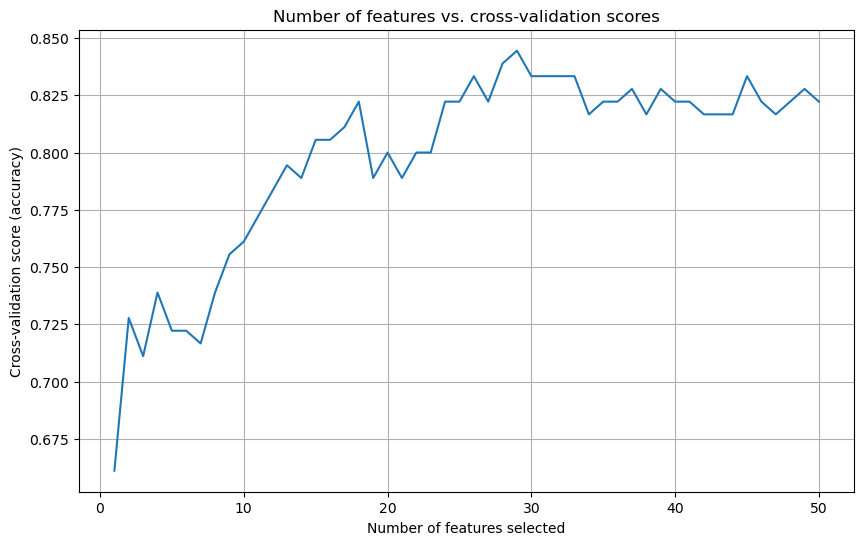

(29,
 ['alpha_ec_4',
  'alpha_ec_10',
  'alpha_ec_17',
  'alpha_ec_23',
  'alpha_ec_26',
  'alpha_ec_35',
  'alpha_ec_47',
  'theta_ec_25',
  'ratio_alpha_3',
  'ratio_beta_3',
  'ratio_beta_4',
  'ratio_beta_5',
  'ratio_beta_8',
  'ratio_beta_10',
  'ratio_beta_12',
  'ratio_beta_13',
  'ratio_beta_14',
  'ratio_beta_15',
  'ratio_beta_21',
  'ratio_beta_22',
  'ratio_beta_26',
  'ratio_beta_33',
  'ratio_beta_34',
  'ratio_beta_35',
  'ratio_beta_36',
  'ratio_beta_37',
  'ratio_beta_38',
  'ratio_beta_41',
  'ratio_beta_47'])

In [17]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

# Setting up the SVM classifier for feature selection
svm_clf = SVC(kernel="linear")

# Setting up RFECV with StratifiedKFold for cross-validation
# Using StratifiedKFold to maintain the same proportion of classes in each fold
cv_strategy = StratifiedKFold(n_splits=5)

# Reducing the feature set to the top 50 features selected by the filtering method
reduced_data = data_normalized_df[selected_features]

# Re-running RFECV with the reduced dataset
rfecv = RFECV(estimator=svm_clf, step=1, cv=cv_strategy, scoring='accuracy')



# Fitting RFECV on the data
rfecv.fit(reduced_data, labels.iloc[:, 0])

# Extracting cross-validation results
cv_results = rfecv.cv_results_

# Plotting number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(cv_results['mean_test_score']) + 1), cv_results['mean_test_score'])
plt.title('Number of features vs. cross-validation scores')
plt.grid()
plt.show()


# Number of optimal features
optimal_features_count = rfecv.n_features_

# Features selected by RFECV
selected_features_rfecv = reduced_data.columns[rfecv.support_]

optimal_features_count, selected_features_rfecv.tolist()




In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Implementing L1 regularization with Logistic Regression
l1_logistic = LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=42)
l1_logistic.fit(data_normalized_df, labels.iloc[:, 0])

# Using SelectFromModel to select features with non-zero coefficients
model = SelectFromModel(l1_logistic, prefit=True)
selected_data_l1 = model.transform(data_normalized_df)

# Getting the selected feature names
selected_features_l1 = data_normalized_df.columns[model.get_support()]

# Number of features selected
num_features_l1 = selected_data_l1.shape[1]

num_features_l1, selected_features_l1.tolist()


/home/alex/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(48,
 ['alpha_ec_17',
  'alpha_ec_21',
  'alpha_ec_23',
  'alpha_ec_28',
  'alpha_ec_31',
  'alpha_ec_37',
  'alpha_ec_45',
  'beta_ec_11',
  'beta_ec_26',
  'theta_ec_2',
  'theta_ec_25',
  'theta_ec_46',
  'alpha_eo_3',
  'alpha_eo_5',
  'alpha_eo_9',
  'alpha_eo_22',
  'alpha_eo_31',
  'alpha_eo_34',
  'beta_eo_16',
  'beta_eo_24',
  'beta_eo_26',
  'beta_eo_40',
  'theta_eo_17',
  'theta_eo_21',
  'theta_eo_22',
  'theta_eo_25',
  'theta_eo_26',
  'theta_eo_31',
  'theta_eo_32',
  'ratio_alpha_3',
  'ratio_alpha_5',
  'ratio_alpha_6',
  'ratio_alpha_24',
  'ratio_beta_4',
  'ratio_beta_11',
  'ratio_beta_13',
  'ratio_beta_18',
  'ratio_beta_21',
  'ratio_beta_24',
  'ratio_beta_30',
  'ratio_beta_32',
  'ratio_beta_35',
  'ratio_beta_44',
  'ratio_beta_47',
  'ratio_theta_14',
  'ratio_theta_19',
  'ratio_theta_28',
  'ratio_theta_39'])

In [19]:
from sklearn.model_selection import LeaveOneGroupOut, cross_validate
from sklearn.neighbors import KNeighborsClassifier

# Leave-One-Group-Out Cross-Validation setup
logo = LeaveOneGroupOut()

# Placeholder for results
results = {}

# Subject groups for cross-validation (assuming each 10 rows belong to a different subject)
groups = [i // 10 for i in range(data.shape[0])]

# Models to evaluate
models = {
    "SVM": SVC(kernel="linear"),
    "KNN": KNeighborsClassifier()
}

# Using the feature set from the filtering method for model training and evaluation
X = selected_data_df
y = labels.iloc[:, 0]

# Performing cross-validation for each model
for name, model in models.items():
    cv_scores = cross_validate(model, X, y, groups=groups, cv=logo, 
                               scoring=['accuracy', 'recall', 'precision'],
                               return_train_score=False)
    
    results[name] = cv_scores

results

/home/alex/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alex/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alex/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alex/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall

{'SVM': {'fit_time': array([0.00657248, 0.00364542, 0.00388217, 0.00615144, 0.00784016,
         0.00658488, 0.00669026, 0.00585246, 0.01135492, 0.00755715,
         0.00474501, 0.00631475, 0.00721836, 0.02907014, 0.01071358,
         0.00609875, 0.00544119, 0.00546193]),
  'score_time': array([0.00677395, 0.00549364, 0.00671506, 0.00446415, 0.00507164,
         0.00474668, 0.00592685, 0.00502133, 0.00461984, 0.0053606 ,
         0.00617957, 0.00638127, 0.00702882, 0.01770973, 0.0041821 ,
         0.00986004, 0.00544143, 0.00592947]),
  'test_accuracy': array([0.6, 0.8, 0.8, 0.9, 0.9, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9, 0.7, 0.8,
         1. , 0.8, 0.7, 0.7, 0.7]),
  'test_recall': array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0.7, 0.8,
         1. , 0.8, 0.7, 0.7, 0.7]),
  'test_precision': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
         1.])},
 'KNN': {'fit_time': array([0.00162816, 0.00233507, 0.00132537, 0.00188112, 0.00150919,
        

In [20]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

# Setting up GridSearchCV for SVM with Leave-One-Group-Out cross-validation
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=logo, scoring='accuracy', n_jobs=-1)

# Fitting the grid search to the data
svm_grid_search.fit(X, y, groups=groups)

# Best parameters and best score for SVM
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

svm_best_params, svm_best_score

({'C': 10, 'kernel': 'rbf'}, 0.8166666666666668)

# FWR aka method 2

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# File paths
data_file = 'csv/data.csv'
labels_file = 'csv/labels.csv'

# Reload the datasets
data = pd.read_csv(data_file, header=None)
labels = pd.read_csv(labels_file, header=None)

# Data Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame for easier handling in later steps
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# Display the first few rows of the scaled data
data_scaled_df_head = data_scaled_df.head()
data_scaled_df_head, len(data_scaled_df)
#data_scaled_df

# Save the scaled data to a CSV file
#data_scaled_df.to_csv('csv/data_scaled.csv', index=False)

(        0         1         2         3         4         5         6    \
 0 -1.376627 -1.355841 -1.360565 -1.282122 -1.363906 -1.363955 -1.378199   
 1 -0.497158 -0.659425 -0.700764  0.010004 -0.137413 -0.415607 -0.622363   
 2 -0.163383 -0.048920 -0.071584 -0.582529  0.182062  0.420333  0.412327   
 3  1.685531  1.783604  1.804268  1.082636  1.709777  1.939286  2.148622   
 4 -1.113211 -1.223275 -1.269047 -1.068874 -1.137345 -1.179503 -1.245073   
 
         7         8         9    ...       422       423       424       425  \
 0 -1.389515 -1.426743 -1.157623  ... -0.571508 -0.356933 -0.536192 -0.556666   
 1 -0.638454 -0.619863 -0.637086  ... -0.865352 -0.880993 -0.744585 -0.629078   
 2  0.163416 -0.327414 -0.517172  ... -0.507945 -0.195742  0.142157 -0.860019   
 3  2.257987  1.876349  0.711178  ... -1.021302 -0.979193 -0.744156 -0.348257   
 4 -1.298327 -1.241881 -1.087742  ...  1.096609  0.910039  0.344719  2.303849   
 
         426       427       428       429       430  

In [22]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Feature Selection using Filter Method (SelectKBest with mutual information)
k = 100  # Number of features to select
select_k_best = SelectKBest(mutual_info_classif, k=k)
data_selected = select_k_best.fit_transform(data_scaled_df, labels.values.ravel())

# Convert the selected data back to a DataFrame for easier handling in later steps
selected_features = data_scaled_df.columns[select_k_best.get_support()]
data_selected_df = pd.DataFrame(data_selected, columns=selected_features)

# Display the first few rows of the data with selected features
data_selected_df_head = data_selected_df.head()
data_selected_df_head, len(data_selected_df)
#data_selected_df

# Save the selected data to a CSV file
#data_selected_df.to_csv('csv/data_selected.csv', index=False)

(        3         9         10        13        17        21        23   \
 0 -1.282122 -1.157623 -1.442808 -1.384686 -1.291956 -1.395789 -1.306044   
 1  0.010004 -0.637086  0.297024 -0.516496  0.036352 -0.115776 -0.370996   
 2 -0.582529 -0.517172  0.149837 -0.023925  0.483514  0.278146  0.351963   
 3  1.082636  0.711178  1.357448  2.160382  0.566587  0.994901  0.139309   
 4 -1.068874 -1.087742 -1.264447 -0.947825 -1.090461 -0.513482 -0.806732   
 
         25        31        37   ...       373       374       377       378  \
 0 -1.221520 -1.316433 -1.199646  ...  0.264553 -0.280867 -0.164221 -0.044100   
 1  0.225838  0.154397 -0.087897  ...  0.365921  0.329178  1.394260  1.080341   
 2  0.453726  0.756902 -0.375331  ... -0.487606 -0.741866 -0.675333 -0.518557   
 3  0.945642 -0.420518  1.256854  ... -1.372743 -1.321074 -1.004735 -0.778944   
 4 -1.114830 -0.818276 -1.189756  ...  0.025490 -0.468988 -0.641517 -0.379719   
 
         383       409       416       419       420  

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Wrapper Method: Recursive Feature Elimination (RFE)
# Using Logistic Regression as the estimator
estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=100, step=10)
selector = selector.fit(data_scaled_df, labels.values.ravel())

# Get the selected features from RFE
selected_features_rfe = data_scaled_df.columns[selector.support_]
data_selected_rfe_df = data_scaled_df[selected_features_rfe]

# Display the first few rows of the data with selected features by RFE
data_selected_rfe_df_head = data_selected_rfe_df.head()
data_selected_rfe_df_head, len(data_selected_rfe_df)
#data_selected_rfe_df

# Save the selected data to a CSV file
#data_selected_rfe_df.to_csv('csv/data_selected_rfe.csv', index=False)

(        16        21        23        28        31        39        45   \
 0 -1.365277 -1.395789 -1.306044 -1.457986 -1.316433 -1.231454 -1.441125   
 1 -0.608742 -0.115776 -0.370996 -1.009095  0.154397  0.503747  0.094706   
 2  0.210659  0.278146  0.351963 -0.856644  0.756902  0.024807  0.335669   
 3  1.286383  0.994901  0.139309  0.847209 -0.420518  0.811304  0.917814   
 4 -0.830469 -0.513482 -0.806732 -0.495959 -0.818276 -1.217444 -1.171164   
 
         53        54        59   ...       371       380       381       383  \
 0  1.345939  1.273211  1.302905  ...  0.253503 -0.106444 -0.325810  1.895824   
 1 -0.745187 -0.811576 -0.749071  ...  0.649766  2.643596  2.563505  0.739067   
 2  0.084962 -0.039321  0.231545  ... -0.001051 -0.703475 -1.011870 -0.032838   
 3 -0.813236 -0.818065 -0.770478  ... -1.153625 -0.895784 -0.338154 -1.182406   
 4 -0.688866 -0.599761 -0.756899  ...  0.006599 -1.092429 -1.384363 -0.589545   
 
         385       398       409       417       422  

In [24]:
from sklearn.linear_model import LassoCV

# Embedded Method: Lasso for feature selection
lasso = LassoCV(cv=5, max_iter=10000, random_state=0)
lasso.fit(data_scaled_df, labels.values.ravel())

# Get the selected features from Lasso (non-zero coefficients)
selected_features_lasso = data_scaled_df.columns[lasso.coef_ != 0]
data_selected_lasso_df = data_scaled_df[selected_features_lasso]

# Display the first few rows of the data with selected features by Lasso
data_selected_lasso_df_head = data_selected_lasso_df.head()
data_selected_lasso_df_head, len(selected_features_lasso)
#data_selected_lasso_df

# Save the selected data to a CSV file
#data_selected_lasso_df.to_csv('csv/data_selected_lasso.csv', index=False)

(        5         23        28        31        33        37        45   \
 0 -1.363955 -1.306044 -1.457986 -1.316433 -1.239706 -1.199646 -1.441125   
 1 -0.415607 -0.370996 -1.009095  0.154397  0.137934 -0.087897  0.094706   
 2  0.420333  0.351963 -0.856644  0.756902  0.087325 -0.375331  0.335669   
 3  1.939286  0.139309  0.847209 -0.420518  0.891742  1.256854  0.917814   
 4 -1.179503 -0.806732 -0.495959 -0.818276 -1.269954 -1.189756 -1.171164   
 
         51        59        66   ...       391       392       398       400  \
 0  2.230201  1.302905  1.380048  ... -0.448798 -0.334293  0.488093  0.249414   
 1 -0.408895 -0.749071 -0.520822  ... -0.835606 -0.669301 -0.727764 -0.453114   
 2  1.161125  0.231545  0.920136  ... -0.858748 -0.739436 -0.980269 -0.818074   
 3 -0.625966 -0.770478 -0.933275  ... -0.695307 -0.207258 -0.506591 -0.812105   
 4 -0.707602 -0.756899 -0.746691  ...  1.622150  1.058533  1.388465  1.003830   
 
         412       417       419       420       422  

In [25]:
data.shape, data_selected_df.shape, data_selected_rfe_df.shape, data_selected_lasso_df.shape, labels.shape

((180, 432), (180, 100), (180, 100), (180, 82), (180, 1))

In [26]:
labels.shape[0]

180

In [27]:
data_selected.shape

(180, 100)

In [28]:
# Correcting the group definition for Leave-One-Group-Out Cross-Validation
# Assuming each subject has the same number of samples
n_samples = data_selected.shape[0]  # Total number of samples in the dataset
n_subjects = 18  # Number of subjects
samples_per_subject = n_samples // n_subjects  # Assuming equal distribution of samples

# Define groups based on the number of subjects and samples per subject
groups_corrected = np.repeat(np.arange(n_subjects), samples_per_subject)

# Verify the length of groups matches the number of samples in datasets
len(groups_corrected) == n_samples

True

In [29]:
samples_per_subject

10

In [30]:
print(groups_corrected.shape)
groups_corrected

(180,)


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17])

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut
import numpy as np

# Defining Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Preparing the groups for cross-validation (assuming each 10 samples belong to one subject)
groups = np.repeat(np.arange(labels.shape[0] / 10), 10)

# SVM Classifier - GridSearch for Hyperparameter Tuning
# Defining a range of C values for tuning
parameters = {'C': [0.1, 1, 10, 100]}

# Training SVM on the dataset from the Filter Method (Mutual Information)
svm_classifier = SVC(kernel='rbf', random_state=0)
svm_grid_search = GridSearchCV(svm_classifier, parameters, cv=logo, scoring='accuracy')
svm_grid_search.fit(data_selected_df, labels.values.ravel(), groups=groups)

# Best parameters and score from the grid search
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

svm_best_params, svm_best_score

({'C': 10}, 0.922222222222222)

In [32]:
# Training SVM on the dataset from the Wrapper Method (RFE)
svm_classifier = SVC(kernel='rbf', random_state=0)
svm_grid_search = GridSearchCV(svm_classifier, parameters, cv=logo, scoring='accuracy')
svm_grid_search.fit(data_selected_rfe_df, labels.values.ravel(), groups=groups_corrected)

# Best parameters and score from the grid search
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

svm_best_params, svm_best_score

({'C': 10}, 0.9500000000000001)

In [33]:
# Training SVM on the dataset from the Embedded Method (Lasso)
svm_classifier = SVC(kernel='rbf', random_state=0)
svm_grid_search = GridSearchCV(svm_classifier, parameters, cv=logo, scoring='accuracy')
svm_grid_search.fit(data_selected_lasso_df, labels.values.ravel(), groups=groups_corrected)

# Best parameters and score from the grid search
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

svm_best_params, svm_best_score

({'C': 10}, 0.9611111111111109)

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
import numpy as np

# Initialize the SVM classifier with RBF kernel
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# We will need to know the group for each sample (which subject it belongs to)
# Assuming the data is ordered by subject and each subject has the same number of samples
n_samples_per_subject = int(len(data) / 18)  # 18 subjects
groups = np.repeat(range(18), n_samples_per_subject)

# Prepare datasets for training
datasets = {
    'Filter Method (MI)': data_selected_df,
    'Wrapper Method (RFE)': data_selected_rfe_df,
    'Embedded Method (Lasso)': data_selected_lasso_df
}

# Function to evaluate model using Leave-One-Group-Out Cross-Validation
def evaluate_model(model, X, y, groups):
    scores = cross_val_score(model, X, y.values.ravel(), groups=groups, cv=logo, scoring='accuracy')
    return np.mean(scores), np.std(scores)

# Evaluate SVM on each dataset
svm_results = {method: evaluate_model(svm_clf, dataset, labels, groups) for method, dataset in datasets.items()}
svm_results

{'Filter Method (MI)': (0.8722222222222222, 0.08695819912499181),
 'Wrapper Method (RFE)': (0.9388888888888888, 0.06781419786518722),
 'Embedded Method (Lasso)': (0.922222222222222, 0.06285393610547087)}